# **FRAMEWORKS DE DEEPLEARNING**
# **Prática - Keras**
**Autor**: Renan Santos Mendes

**Email**: renansantosmendes@gmail.com

**Descrição**: Este notebook apresenta um exemplo de uma rede neural profunda com mais de uma camada para um problema de classificação.


# **Saúde Fetal**

As Cardiotocografias (CTGs) são opções simples e de baixo custo para avaliar a saúde fetal, permitindo que os profissionais de saúde atuem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

Este conjunto de dados contém 2126 registros de características extraídas de exames de Cardiotocografias, que foram então classificados por três obstetras especialistas em 3 classes:

- Normal
- Suspeito
- Patológico

# 1 - Importando os módulos necessários

In [ ]:
import os
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2

import random
import numpy as np
import random as python_random
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import plotly

In [ ]:
plotly.__version__

'5.15.0'

In [ ]:
import pydot

In [ ]:
pydot.__version__

'1.4.2'

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==0.32.1
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.13
albumentations==1.4.14
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.2
astropy-iers-data==0.2024.8.26.0.31.57
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.15.0
bigquery-magics==0.1.1
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.7.4
cffi==1.17.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.30.2
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
c

# Definindo funções adicionais

In [ ]:
def plot_convergence(hist, metric):

  df = pd.DataFrame(hist.history)
  fig = px.line(df,
                x=np.arange(df[metric].shape[0]),
                y=[f'{metric}', f'val_{metric}'])
  fig.show()

def reset_seeds():
   os.environ['PYTHONHASHSEED']=str(42)
   tf.random.set_seed(42)
   np.random.seed(42)
   random.seed(42)

# 2 - Fazendo a leitura do dataset e atribuindo às respectivas variáveis

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/renansantosmendes/lectures-cdas-2023/master/fetal_health.csv')

In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data['fetal_health'].value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


# 3 - Preparando o dado antes de iniciar o treino do modelo

In [ ]:
X=data.drop(["fetal_health"], axis=1)
y=data["fetal_health"] - 1

In [ ]:
columns_names = list(X.columns)
X_df = preprocessing.StandardScaler().fit_transform(X)
X_df = pd.DataFrame(X_df, columns=columns_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# 4 - Criando o modelo e adicionando as camadas

In [ ]:
tensorflow.__version__

'2.17.0'

In [ ]:
X_train.iloc[0].shape

(21,)

In [ ]:
Dense?

In [ ]:
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
from keras.utils import plot_model

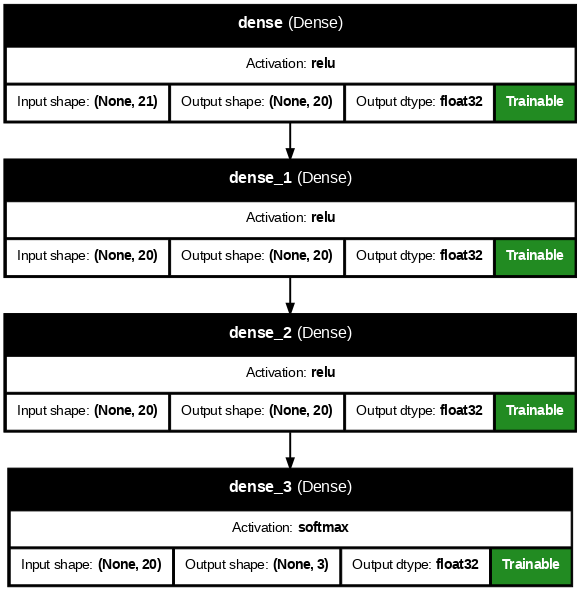

In [ ]:
plot_model(model, to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    show_layer_activations=True,
    show_trainable=True)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 1,343 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.trainable = True

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 1,343 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

# 5 - Compilando o modelo


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 6 - Executando o treino do modelo

In [ ]:
Sequential?

In [ ]:
%%time
hist = model.fit(x=X_train,
                 y=y_train,
                 epochs=25,
                 validation_split=0.2,
                 batch_size=128)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4607 - loss: 1.0473 - val_accuracy: 0.7651 - val_loss: 0.8564
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7606 - loss: 0.8431 - val_accuracy: 0.8255 - val_loss: 0.7279
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7898 - loss: 0.7345 - val_accuracy: 0.8289 - val_loss: 0.6348
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7955 - loss: 0.6577 - val_accuracy: 0.8322 - val_loss: 0.5639
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.5991 - val_accuracy: 0.8389 - val_loss: 0.5056
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8017 - loss: 0.5499 - val_accuracy: 0.8423 - val_loss: 0.4575
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8042 - loss: 0.5090 - val_accuracy: 0.8490 - val_loss: 0.4171
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8053 - loss: 0.4735 - val_accuracy: 0.8456 - val_loss

In [ ]:
# hist.history

# 6.1 Avaliando o modelo

# 6.2 Plotando a acurácia do modelo

In [ ]:
plot_convergence(hist, 'loss')

In [ ]:
plot_convergence(hist, 'accuracy')

In [ ]:
model.evaluate(x=X_test, y=y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.2665  


[0.2617698013782501, 0.8996865153312683]

In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(x=X_train,
                 y=y_train,
                 epochs=25,
                 validation_split=0.2,
                 batch_size=64,
                 verbose=3)

model.evaluate(x=X_test, y=y_test)

Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8997 - loss: 0.2485 
CPU times: user 4.39 s, sys: 142 ms, total: 4.53 s
Wall time: 5.43 s


[0.24934913218021393, 0.8996865153312683]

# DagsHub
<img src="https://api.flatworld.co/wp-content/uploads/2020/10/DAGsHub-Logo.png" height=100>


DagsHub é uma plataforma de colaboração e compartilhamento de código voltada para a comunidade de Ciência de Dados e Machine Learning. É uma plataforma que permite que os desenvolvedores, cientistas de dados e pesquisadores compartilhem seus projetos, coletem feedback de outros usuários, colaborem em projetos em equipe e gerenciem seu fluxo de trabalho de desenvolvimento de forma mais eficiente.

A plataforma é baseada em Git e Git-LFS, o que significa que o controle de versão e o gerenciamento de arquivos são suportados nativamente. Além disso, o DagsHub oferece uma série de recursos adicionais que visam melhorar a experiência de desenvolvimento de projetos de Ciência de Dados e Machine Learning, como integração com ferramentas de treinamento de modelos, ambientes de execução, Jupyter notebooks e fluxos de trabalho de DAGs (gráficos acíclicos direcionados).


Com o DagsHub, os usuários podem compartilhar seus projetos publicamente ou limitar o acesso a equipes específicas, criando uma comunidade de colaboração de dados e Machine Learning mais ampla. A plataforma também incentiva a colaboração em projetos de código aberto, com recursos para facilitar a contribuição e a revisão de código pelos usuários.

Em resumo, o DagsHub é uma plataforma completa para compartilhamento, colaboração e gerenciamento de projetos de Ciência de Dados e Machine Learning, que tem como objetivo tornar o trabalho em equipe mais fácil e eficiente para os usuários.

### [Link](https://dagshub.com/) para acesso.

In [ ]:
%%capture
!pip install mlflow dagshub

In [ ]:
import mlflow
import dagshub

mlflow.tensorflow.autolog()
dagshub.init("frameworks_dp_epcd_o2","renansantosmendes")

Initialized MLflow to track repo "renansantosmendes/frameworks_dp_epcd_o2"

Repository renansantosmendes/frameworks_dp_epcd_o2 initialized!

In [ ]:
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'renansantosmendes'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'cc41cc48f8e489dd5b87404dd6f9720944e32e9b'
mlflow.set_tracking_uri('https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow')

mlflow.tensorflow.autolog()

In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

with mlflow.start_run(run_name='run_for_dagshub'):
  hist = model.fit(x=X_train,
                  y=y_train,
                  epochs=25,
                  validation_split=0.2,
                  batch_size=64,
                  verbose=3)

model.evaluate(x=X_test, y=y_test)

2024/08/29 00:47:56 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25


Epoch 2/25


Epoch 3/25


Epoch 4/25


Epoch 5/25


Epoch 6/25


Epoch 7/25


Epoch 8/25


Epoch 9/25


Epoch 10/25


Epoch 11/25


Epoch 12/25


Epoch 13/25


Epoch 14/25


Epoch 15/25


Epoch 16/25


Epoch 17/25


Epoch 18/25


Epoch 19/25


Epoch 20/25


Epoch 21/25


Epoch 22/25


Epoch 23/25


Epoch 24/25


Epoch 25/25


2024/08/29 00:48:45 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/29 00:48:45 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/29 00:48:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/29 00:48:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run run_for_dagshub at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0/runs/cf7d0b53c88e400bbe6ec6631c0aa853.
2024/08/29 00:48:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8997 - loss: 0.2485 
CPU times: user 7 s, sys: 333 ms, total: 7.33 s
Wall time: 1min 4s


[0.24934913218021393, 0.8996865153312683]

In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

print(model.summary())

with mlflow.start_run(run_name='overfitting'):
  hist = model.fit(x=X_train,
                  y=y_train,
                  epochs=25,
                  validation_split=0.2,
                  batch_size=64,
                  verbose=3)

model.evaluate(x=X_test, y=y_test)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 100)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,703 (639.46 KB)

 Trainable params: 163,703 (639.46 KB)

 Non-trainable params: 0 (0.00 B)

None


2024/08/29 00:59:02 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25


Epoch 2/25


Epoch 3/25


Epoch 4/25
Epoch 5/25


Epoch 6/25
Epoch 7/25


Epoch 8/25


Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25


Epoch 15/25
Epoch 16/25


Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25


Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


2024/08/29 00:59:23 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/29 00:59:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/29 00:59:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/29 00:59:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run overfitting at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0/runs/398cb99829fd49f78173826aff4e127b.
2024/08/29 00:59:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.4076 
CPU times: user 10.3 s, sys: 495 ms, total: 10.8 s
Wall time: 36.5 s


[0.39774611592292786, 0.9090909361839294]

In [ ]:
plot_convergence(hist, 'loss')

##**Reduzir a complexidade**

In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

print(model.summary())

with mlflow.start_run(run_name='overfitting'):
  hist = model.fit(x=X_train,
                  y=y_train,
                  epochs=25,
                  validation_split=0.2,
                  batch_size=64,
                  verbose=3)

plot_convergence(hist, 'loss')

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 100)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,003 (207.04 KB)

 Trainable params: 53,003 (207.04 KB)

 Non-trainable params: 0 (0.00 B)

None


2024/08/29 01:09:00 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25


Epoch 2/25


Epoch 3/25


Epoch 4/25


Epoch 5/25


Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25


Epoch 11/25
Epoch 12/25


Epoch 13/25


Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25


Epoch 23/25


Epoch 24/25


Epoch 25/25


2024/08/29 01:09:23 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/29 01:09:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/29 01:09:34 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/29 01:09:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run overfitting at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0/runs/2c67cdf14e12455eb29e0a1980c145a6.
2024/08/29 01:09:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0.


CPU times: user 8.86 s, sys: 324 ms, total: 9.18 s
Wall time: 37.3 s


In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

print(model.summary())

with mlflow.start_run(run_name='overfitting'):
  hist = model.fit(x=X_train,
                  y=y_train,
                  epochs=25,
                  validation_split=0.2,
                  batch_size=64,
                  verbose=3)

plot_convergence(hist, 'loss')

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 50)                  │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,903 (34.78 KB)

 Trainable params: 8,903 (34.78 KB)

 Non-trainable params: 0 (0.00 B)

None


2024/08/29 01:10:33 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25


Epoch 2/25


Epoch 3/25


Epoch 4/25


Epoch 5/25


Epoch 6/25


Epoch 7/25


Epoch 8/25


Epoch 9/25


Epoch 10/25


Epoch 11/25


Epoch 12/25


Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25


Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


2024/08/29 01:11:01 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/29 01:11:01 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/29 01:11:12 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/29 01:11:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run overfitting at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0/runs/df3ef6fe6b2d4ac8823c9f2364fb53a2.
2024/08/29 01:11:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.2772 
CPU times: user 7.13 s, sys: 363 ms, total: 7.5 s
Wall time: 41.2 s


[0.2880127727985382, 0.9200627207756042]

In [ ]:
plot_convergence(hist, 'loss')

In [ ]:
from keras.regularizers import L1

In [ ]:
%%time
reset_seeds()
model = Sequential()
model.add(InputLayer(shape=X_train.iloc[0].shape))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=300, activation='relu', kernel_regularizer=L1(0.1)))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

print(model.summary())

with mlflow.start_run(run_name='overfitting'):
  hist = model.fit(x=X_train,
                  y=y_train,
                  epochs=25,
                  validation_split=0.2,
                  batch_size=64,
                  verbose=3)

plot_convergence(hist, 'loss')

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 100)                 │           2,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,703 (639.46 KB)

 Trainable params: 163,703 (639.46 KB)

 Non-trainable params: 0 (0.00 B)

None


2024/08/29 01:23:50 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25


Epoch 2/25


Epoch 3/25


Epoch 4/25


Epoch 5/25


Epoch 6/25


Epoch 7/25


Epoch 8/25


Epoch 9/25


Epoch 10/25


Epoch 11/25
Epoch 12/25


Epoch 13/25
Epoch 14/25


Epoch 15/25


Epoch 16/25


Epoch 17/25


Epoch 18/25


Epoch 19/25
Epoch 20/25


Epoch 21/25


Epoch 22/25


Epoch 23/25


Epoch 24/25
Epoch 25/25


2024/08/29 01:24:32 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/29 01:24:32 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/29 01:24:44 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/29 01:24:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run overfitting at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0/runs/d51c0481cab544cb981dd3df69b7dee1.
2024/08/29 01:24:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/renansantosmendes/frameworks_dp_epcd_o2.mlflow/#/experiments/0.


CPU times: user 12 s, sys: 572 ms, total: 12.5 s
Wall time: 56.4 s
